# import

In [472]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

# load data

In [473]:
df = pd.read_csv('all_items_no_duplicate.csv')
# view
df.head(10)

,pid,rating_average,reviews_count,item,price,Công ty phát hành,Ngày xuất bản,Kích thước,Loại bìa,Số trang,category
0,304497.0,4.2,327,Hôm Nay Tôi Thất Tình,68700.0,Skybooks,2017-01-04 00:00:00,13 x 20.5 cm,Bìa mềm,200.0,sách tình cảm
1,339724.0,4.5,15,Người Đàn Bà Đang Yêu (Tiểu Thuyết),148000.0,Liên Việt,2011-06-03 00:00:00,16x24 cm,Bìa mềm,644.0,sách tiểu thuyết
2,341382.0,4.5,11,100 Ý Tưởng Viết Quảng Cáo Tuyệt Hay,89000.0,NXB Trẻ,2011-09-15 00:00:00,13 x 20.5 cm,Bìa mềm,318.0,sách viến tưởng
3,361889.0,0.0,0,60 Món Ăn Được Ưa Thích - Món Thịt Heo,24600.0,Công Ty TNHH Văn Hóa Việt Thư,2010-09-30 00:00:00,14.5 x 20.5 cm,Bìa mềm,64.0,sách nấu ăn
4,362055.0,4.7,14,"Nấu Ăn Ngon - Các Món Kho, Nướng",24600.0,Công Ty TNHH Văn Hóa Việt Thư,2011-12-30 00:00:00,14.5 x 20.5 cm,Bìa mềm,64.0,sách nấu ăn
5,362140.0,4.4,5,Món Ăn Hàng Ngày,24300.0,Công Ty TNHH Văn Hóa Việt Thư,2012-01-15 00:00:00,14.5 x 20.5 cm,Bìa mềm,64.0,sách nấu ăn
6,365991.0,4.8,19,Bộ Sách Phát Triển Trí Tuệ Trẻ Em (10 Cuốn) (Tái Bản),75500.0,Công Ty Cổ Phần Văn Hóa Đông A,2011-03-15 00:00:00,Đang cập nhật,Bìa mềm,160.0,sách trẻ em
7,366108.0,4.6,56,Tủ Sách Bách Khoa Tri Thức Trẻ Em - Bí Ẩn Của Đại Dương (Tái Bản),63000.0,Huy Hoàng Bookstore,2012-10-15 00:00:00,20.5 x 27 cm,Bìa cứng,60.0,sách trẻ em
8,374106.0,4.7,59,Truyện Tranh Tuổi Thần Tiên (Bộ Túi 8 Cuốn),62000.0,Minh Long,2013-07-25 07:00:00,19 x 27 cm,NaN,NaN,truyện tranh
9,381234.0,4.7,1087,Cuốn Sách Hoàn Hảo Về Ngôn Ngữ Cơ Thể - Body Language (Tái Bản),159000.0,Nhân Trí Việt,2014-08-03 00:00:00,14 x 21.5 cm,Bìa mềm,456.0,sách


In [474]:
# save a original copy
df_original = df.copy()

In [475]:
from pprint import pprint

df.rename(columns={
    'Công ty phát hành': 'publisher',
    'Ngày xuất bản': 'publish_date',
    'Kích thước': 'size',
    'Loại bìa': 'cover_type',
    'Số trang': 'num_pages',
    'item': 'book_name'
}, inplace=True)

# General Information

In [476]:
# change column price to last colume and drop pid colume
cols = df.columns.tolist()
price_idx = cols.index('price')
cols = cols[1:price_idx] + cols[price_idx+1:] + [cols[price_idx]]
df = df[cols]
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2014 entries, 0 to 2013
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   rating_average  2014 non-null   float64
 1   reviews_count   2014 non-null   int64  
 2   book_name       2014 non-null   object 
 3   publisher       2014 non-null   object 
 4   publish_date    891 non-null    object 
 5   size            670 non-null    object 
 6   cover_type      1465 non-null   object 
 7   num_pages       1151 non-null   object 
 8   category        2014 non-null   object 
 9   price           2014 non-null   float64
dtypes: float64(2), int64(1), object(7)
memory usage: 157.5+ KB


Hầu hết các đặc trưng đề có dạng Object, chỉ có 2 đặc trưng là có dạng số (rating_average, reviews_count). Đây đều là những features thuộc dạng liên tục (coninuous)

In [477]:
# number of total examples
print('Total examples: ', len(df))

Total examples:  2014


In [478]:
df.describe()

,rating_average,reviews_count,price
count,2014.000000,2014.000000,2.014000e+03
mean,1.436197,117.590367,1.596704e+05
std,2.196204,524.472192,2.104356e+05
min,0.000000,0.000000,8.600000e+03
25%,0.000000,0.000000,6.795500e+04
50%,0.000000,0.000000,1.190000e+05
75%,4.700000,7.750000,1.930375e+05
max,5.000000,11616.000000,5.575000e+06


Ta thấy rating_average và reviews_count đều có đầy đủ cho tất cả các items. Số sao đánh giá trung bình cho 1 quyển sách là xấp xỉ 1.43, tuy nhiên độ lệch chuẩn lại khá cao (2.19) => chất lượng của những cuốn sách là không đồng đều. Đặc trưng reviews_count cũng thể hiện tương tự với độ lệch chuẩn rất lớn. Có tới tận 50% cuốn sách có rating_average và reviews_count nhỏ hơn 0, trong khi có tới 25% cuốn sách có rating_average > 4.7 (gần với mức tuyệt đối là 5). Điều này một lần nữa cho thấy sự đánh giá của người dùng cho các cuốn sách là rất không đồng đều. Chỉ có một số sách được đặc biệt yêu thích, còn lại gần như không gây hứng thú cho người đọc

In [479]:
# See if there is any null in our data
null_info = pd.DataFrame({'Null count': df.isnull().sum(), 'Null ratio': df.isnull().sum()/len(df)})
null_info.drop('price', inplace=True)
null_info.sort_values(by='Null ratio', ascending=False, inplace=True)
null_info

,Null count,Null ratio
size,1344,0.667329
publish_date,1123,0.557597
num_pages,863,0.428500
cover_type,549,0.272592
rating_average,0,0.000000
reviews_count,0,0.000000
book_name,0,0.000000
publisher,0,0.000000
category,0,0.000000


Các trường ngày xuất bản, kích thước, loại bìa, số trang có khá nhiều giá trị null, đặc biệt trường ngày xuất bản và kích thước có đến hơn một nửa số item bị thiếu

Text(0.5, 1.0, 'Number of null values for each column / Total Items: 2014')

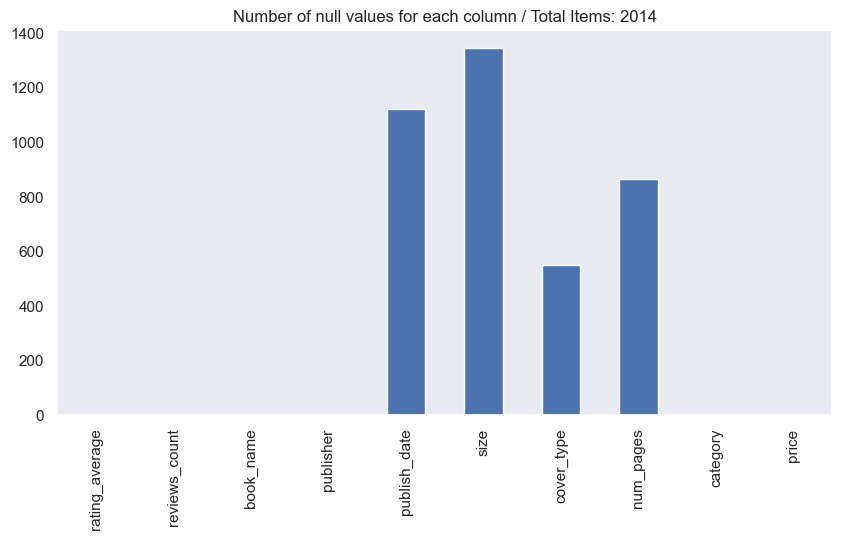

In [480]:
df.isnull().sum().plot(kind='bar', figsize=(10, 5))
plt.title(f'Number of null values for each column / Total Items: {len(df)}')

# Split train val test

Trước khi tìm hiểu quá sâu về dữ liệu, chúng ta sẽ chia tập train val test trước, tránh tìm hiểu quá sâu và dữ liệu test

In [481]:
# split data into train and test
train, test = train_test_split(df, test_size=0.2, random_state=42)

In [482]:
train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1611 entries, 261 to 1126
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   rating_average  1611 non-null   float64
 1   reviews_count   1611 non-null   int64  
 2   book_name       1611 non-null   object 
 3   publisher       1611 non-null   object 
 4   publish_date    708 non-null    object 
 5   size            545 non-null    object 
 6   cover_type      1169 non-null   object 
 7   num_pages       929 non-null    object 
 8   category        1611 non-null   object 
 9   price           1611 non-null   float64
dtypes: float64(2), int64(1), object(7)
memory usage: 138.4+ KB


In [483]:
test.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 403 entries, 1198 to 921
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   rating_average  403 non-null    float64
 1   reviews_count   403 non-null    int64  
 2   book_name       403 non-null    object 
 3   publisher       403 non-null    object 
 4   publish_date    183 non-null    object 
 5   size            125 non-null    object 
 6   cover_type      296 non-null    object 
 7   num_pages       222 non-null    object 
 8   category        403 non-null    object 
 9   price           403 non-null    float64
dtypes: float64(2), int64(1), object(7)
memory usage: 34.6+ KB


# Feature-specific Information

Kể từ giờ, tất cả những phân tích dữ liệu đều được thực hiện trên tập train

## rating_average

In [484]:
train['rating_average']

261     0.0
746     0.0
1380    0.0
240     4.8
1644    4.9
       ... 
1130    0.0
1294    0.0
860     4.6
1459    0.0
1126    4.9
Name: rating_average, Length: 1611, dtype: float64

Text(0.5, 1.0, 'Rating Average Distribution')

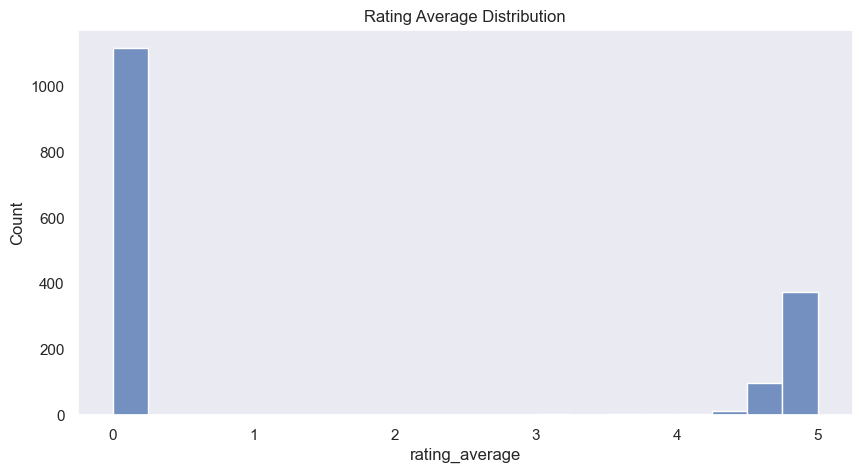

In [485]:
# hist plot for rating_average distributino
plt.figure(figsize=(10, 5))
sns.histplot(train['rating_average'], bins=20, kde=False)
plt.title('Rating Average Distribution')

Hầu hết là các nhận xét là rất không hài lòng (0 sao) hoặc hài lòng - rất hài lòng (4-5 sao). Gần như không có các nhận xét trung bình. Số nhận xét rất không hài lòng chiếm đa số (gần 60%)

Text(0.5, 1.0, 'Rating Average vs Price')

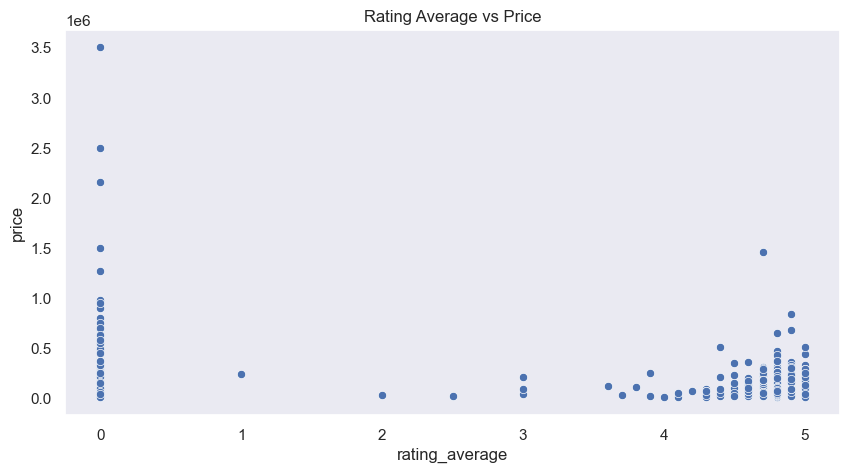

In [486]:
# scatter plot between rating_average and price
plt.figure(figsize=(10, 5))
sns.scatterplot(x=train['rating_average'], y=train['price'])
plt.title('Rating Average vs Price')

Có những cuốn sách dù rating thấp nhưng vẫn có giá cao hơn các cuốn sách có rating cao => không có mối tương quan rõ ràng giữa rating count và price

## reviews_count

In [487]:
train.reviews_count

261       0
746       0
1380      0
240     303
1644     37
       ... 
1130      0
1294      0
860      22
1459      0
1126    342
Name: reviews_count, Length: 1611, dtype: int64

<AxesSubplot:>

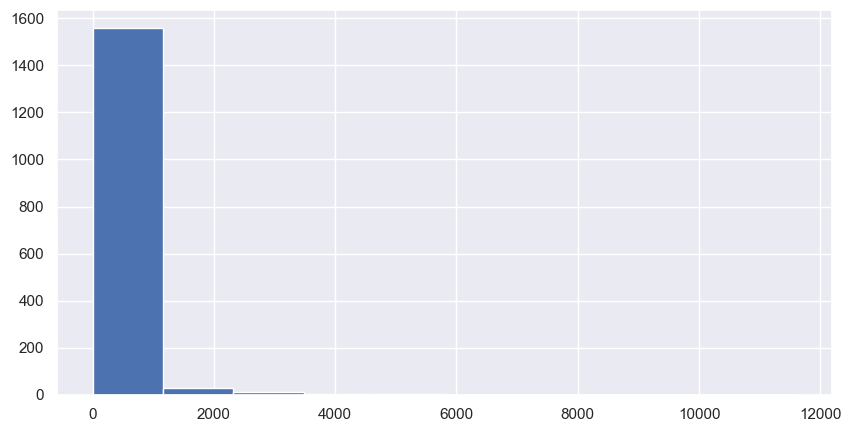

In [488]:
plt.figure(figsize=(10, 5))
train.reviews_count.hist()

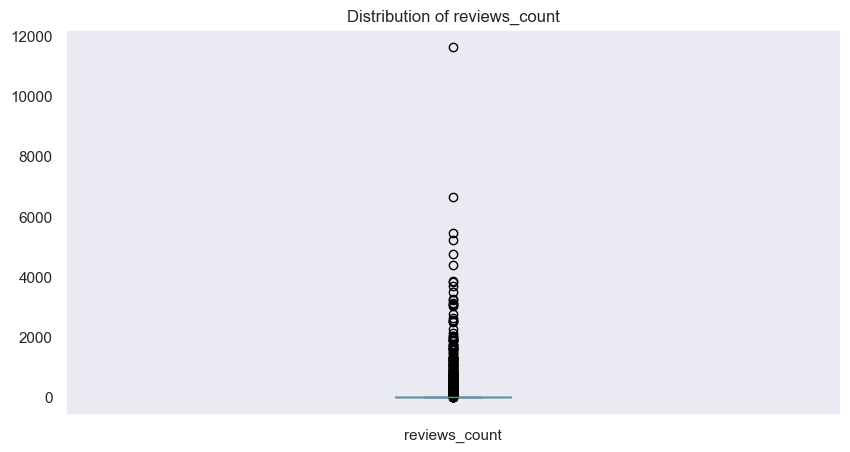

In [489]:
plt.figure(figsize=(10, 5))
df['reviews_count'].plot.box()
plt.title('Distribution of reviews_count')
plt.show()

Hầu hết các cuốn sách đều có ít hơn 1000 reviews. Có một vài outlier có số review rất lớn.
Ta sẽ xem xét quan hệ giữa rating_average và reviews_count

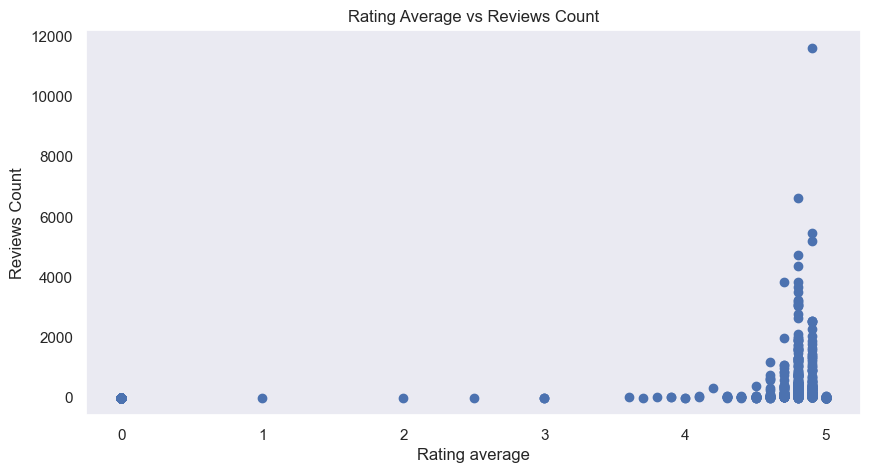

In [490]:
plt.figure(figsize=(10, 5))
plt.scatter(x=df['rating_average'], y=df['reviews_count'])
plt.xlabel('Rating average')
plt.ylabel('Reviews Count')
plt.title('Rating Average vs Reviews Count')
plt.show()


Hầu hết cuốn sách nếu có rating average cao hơn thì sẽ có số  lượng reviews lớn hơn

Text(0.5, 1.0, 'Reviews Count vs Price')

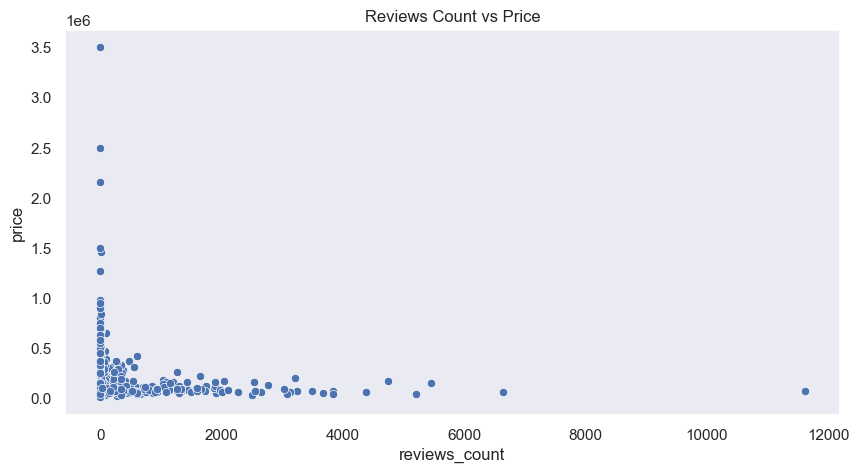

In [491]:
# scatter plot between reviews_count and price
plt.figure(figsize=(10, 5))
sns.scatterplot(x=train['reviews_count'], y=train['price'])
plt.title('Reviews Count vs Price')

Tương tự như rating_average, những cuốn sách có ít reviews hơn, ít phổ biến hơn vẫn có thể có giá cao hơn những cuốn sách ăn khách => chất lượng cuốn sách không phải là yếu tố quan trọng quyết định đến giá. Hoặc có thể những cuốn sách có giá quá cao sẽ khó tiếp cận với người dùng => ít review và rating hơn

## book_name

In [492]:
train.book_name

261                                                                            Combo 2 cuốn sách văn học hay nhất: Người Đua Diều + Chiến Binh Cầu Vồng Tặng sổ tay VDT
746                                                                                                                                Bộ truyện tranh Cổ Oai ơi! Tập 4-5-6
1380                                 Rich habits, poor habits: Sự khác biệt giữa người giàu và người nghèo_ Sách_ Bizbooks_ Sách phát triển bản thân_ Sách hay mỗi ngày
240                                                                                                                           Kinh Doanh - Khái Lược Những Tư Tưởng Lớn
1644                                                           Nghệ thuật tư duy dựa trên dữ liệu - Để ra quyết điịnh thông minh hơn trong một thê giới không chắc chắn
                                                                                     ...                                                                        

In [493]:
# values count for book_name
train.book_name.value_counts(dropna=False)

Tạp chí ELLE tháng 10/2022                                                                   3
Sách - Tiểu Thuyết - Phát Súng Chính Nghĩa (Bộ Hồ Sơ Lửa) - Lại Văn Long                     2
Combo Đạo Tình (Bộ 2 tập - Tái bản 2018) Tặng kèm bookmark yêu thương                        2
Sách - Tiểu Thuyết - Hồng Nhan Sương Khói (Bộ Hồ Sơ Lửa) - Lại Văn Long                      2
Món Ăn Hàng Ngày                                                                             2
                                                                                            ..
Thiên quan tứ phúc - Tập 5 (Tiểu thuyết đam mỹ) -  Tặng kèm 1 bookmark 2 mặt                 1
Sách giáo viên Tin học lớp 10 (Bộ sách Cánh Diều)                                            1
Sách: Tư Duy Như Một Nhà Khoa Học Tên Lửa                                                    1
Tâm Lý Học Biểu Cảm                                                                          1
Combo 2 Cuốn: Bạn Không Thông Minh Lắm Đâu +  Bạn 

In [494]:
print('Book names with 3 occurences: %s', train.book_name.value_counts()[train.book_name.value_counts() == 3].count())
print('Book names with 2 occurences: %s', train.book_name.value_counts()[train.book_name.value_counts() == 2].count())
print('Book names with 1 occurences: %s', train.book_name.value_counts()[train.book_name.value_counts() == 1].count())

Book names with 3 occurences: %s 1
Book names with 2 occurences: %s 11
Book names with 1 occurences: %s 1586


Hầu hết các cuốn sách là không trùng lặp

In [495]:
# see null values for book_name
train.book_name.isnull().sum()

0

no null values for this column


Text(0.5, 1.0, 'Distribution of number of words of book_name')

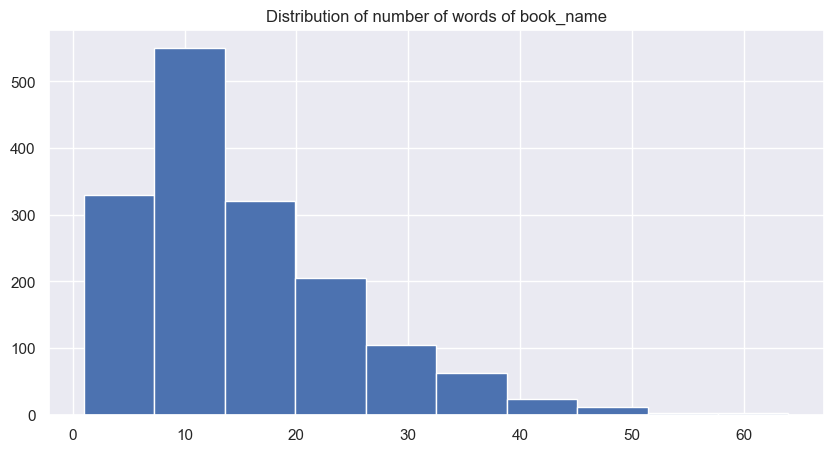

In [496]:
# distribution of number of word of book_name
plt.figure(figsize=(10, 5))
book_name_words = train.book_name.str.split()
# remove element that has len < 1 in book_name_words (. , -)
book_name_words = book_name_words.apply(lambda x: [i for i in x if len(i) > 1])
book_name_words.apply(len).hist()
plt.title('Distribution of number of words of book_name')

Hầu hết tên sách có độ dài nhỏ hơn 20 từ. Cá biệt có một số cuốn sách có tên rất dài (60 từ)

In [497]:
# see book_name that has length > 60
pd.set_option('display.max_colwidth', None)
book_name_words[book_name_words.apply(len) > 60].apply(lambda x: ' '.join(x))

299                                     Bộ sách Thiền sư Thích Nhất Hạnh Phần 1: Gieo Trồng Hạnh Phúc Tìm Bình Yên Trong Gia Đình Muốn An Được An Tĩnh Lặng Đạo Phật Ngày Nay Con Đường Chuyển Hóa Hướng Đi Của Đạo Bụt Cho Hòa Bình Và Sinh Môi Tay Thầy Trong Tay Con Bụt Là Hình Hài Bụt Là Tâm Thức Thiền Sư Khương Tăng Hội
783    Combo sách Siêu Dễ Nhớ Chiết Tự 2102 Từ Tiếng Trung Thông Dụng Nhất Bá Đạo Hack Não Tam Ngữ (Kèm cách nhớ, ví dụ, tiếng Anh, tiêng Trung giản thể, tiếng Trung phồn thể, tiếng bồi, bính âm Pinyin, tiếng Việt &amp; hình ảnh hướng dẫn viết từng nét) 1001 Bức thư viết cho tương lai (có Audio do người Trung Quốc đọc)
Name: book_name, dtype: object

## publisher

In [498]:
train.publisher

261                                Nhã Nam
746     Công ty TNHH Phòng khám Happy Baby
1380                              BIZBOOKS
240         Công Ty Cổ Phần Văn Hóa Đông A
1644                               NXB Trẻ
                       ...                
1130                               Đinh Tị
1294                            Alphabooks
860                                Nhã Nam
1459            Pháp luật Sài Gòn - Hà Nội
1126                            Read Books
Name: publisher, Length: 1611, dtype: object

In [499]:
# count null value
train.publisher.isnull().sum()

0

In [500]:
train.publisher.value_counts()

Nhã Nam                               158
Alphabooks                             87
NXB Trẻ                                80
Nhiều công ty phát hành                68
Đinh Tị                                58
                                     ... 
iBooks                                  1
CÔNG TY TNHH WE UP                      1
Công ty TNHH Rbooks                     1
CÔNG TY TNHH PHAN LỆ &amp; FRIENDS      1
Messy Books                             1
Name: publisher, Length: 271, dtype: int64

Có tất cả 271 nhà phát hành sách khác nhau

Text(0.5, 1.0, 'Top 10 most common publisher')

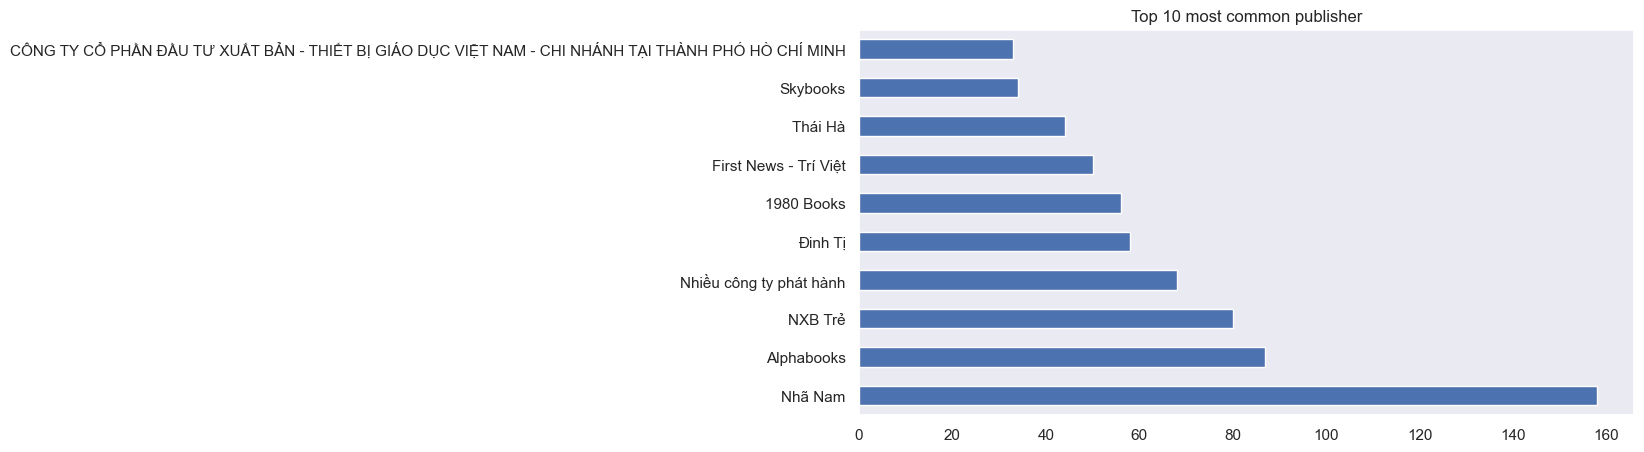

In [501]:
# plot number of occurences of top-10 most common publisher
plt.figure(figsize=(10, 5))
train.publisher.value_counts()[:10].plot(kind='barh')
plt.title('Top 10 most common publisher')

Nhã Nam là nhà phát hành nhiều sách nhất, tiếp theo đó là các thương nhà phát hành nổi tiếng khác như Alphabooks, NXB Trẻ. Có thể thấy đây đều là những NXB chuyên phát hành sách hướng đến người trẻ => hợp lý vì đây là sách được bán trên các sàn thương mại điện tử, dễ tiếp cận với đối tượng khách hàng trẻ hơn

Text(0.5, 1.0, 'Publisher with highest average price')

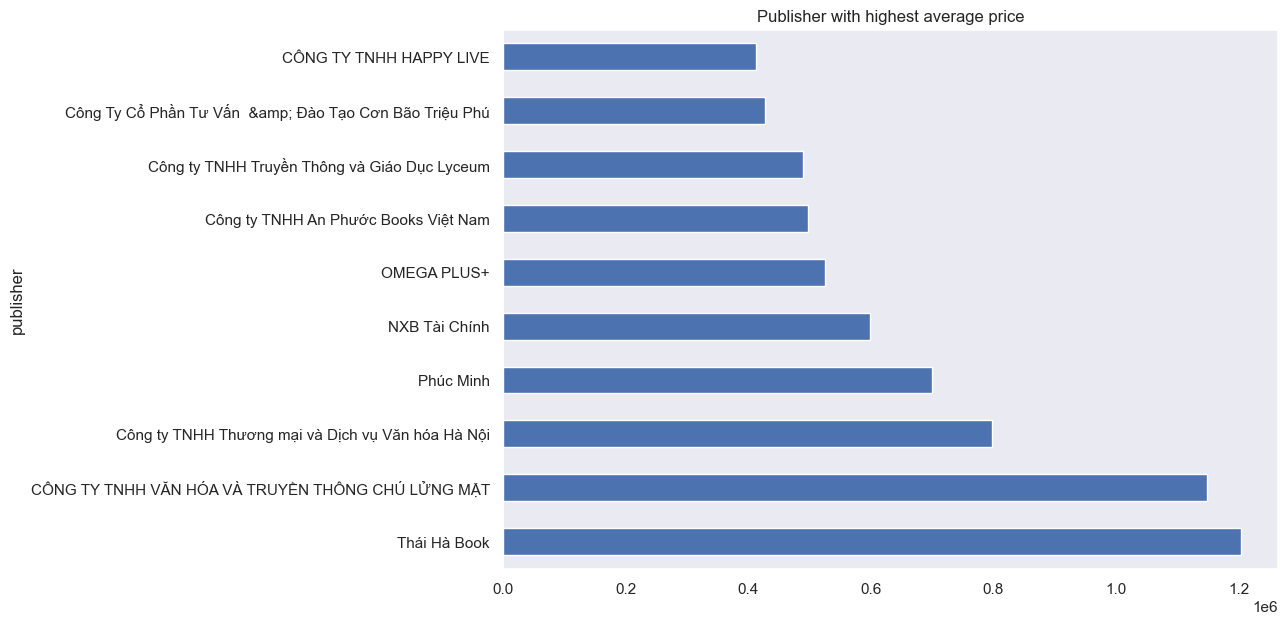

In [502]:
# plot the above result
plt.figure(figsize=(10, 7))
train.groupby('publisher').price.mean().sort_values(ascending=False)[:10].plot(kind='barh')
plt.title('Publisher with highest average price')

Những NXB phát hành sách giá cao thường không nằm trong top những NXB có nhiều sách nhất

## publish_date

In [503]:
train.publish_date

261                     NaN
746     2020-09-04 10:42:15
1380                    NaN
240     2019-06-01 00:00:00
1644    2022-07-11 00:00:00
               ...         
1130                    NaN
1294                    NaN
860     2021-01-01 00:00:00
1459                    NaN
1126    2021-07-01 00:00:00
Name: publish_date, Length: 1611, dtype: object

In [504]:
# remove time in not null publish_date
train.publish_date = train.publish_date.apply(lambda x: x.split(' ')[0] if type(x) == str else x)
train.publish_date

261            NaN
746     2020-09-04
1380           NaN
240     2019-06-01
1644    2022-07-11
           ...    
1130           NaN
1294           NaN
860     2021-01-01
1459           NaN
1126    2021-07-01
Name: publish_date, Length: 1611, dtype: object

Text(0.5, 1.0, 'Distribution of publication by year')

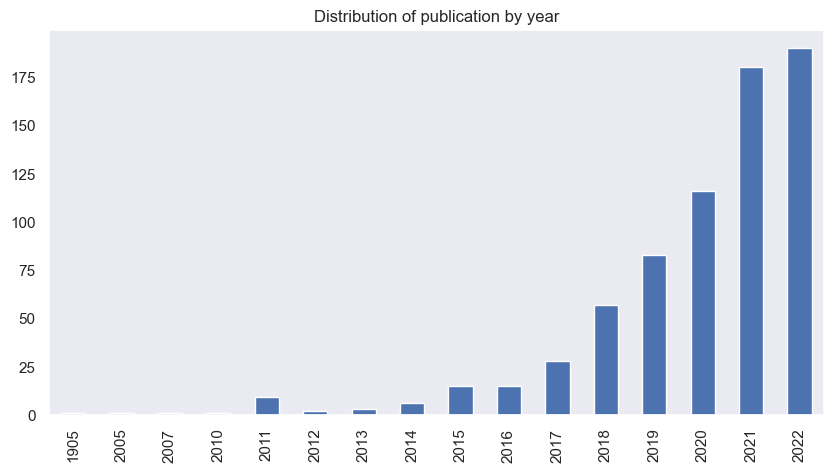

In [505]:
# distribution of publication by year
train.publish_date.apply(lambda x: x.split('-')[0] if type(x)==str else x).value_counts().sort_index().plot(kind='bar', figsize=(10, 5))
plt.title('Distribution of publication by year')

Hầu hết sách được xuất bản trong vòng 5 năm trở lại đây. 

Text(0.5, 0, 'Publish year')

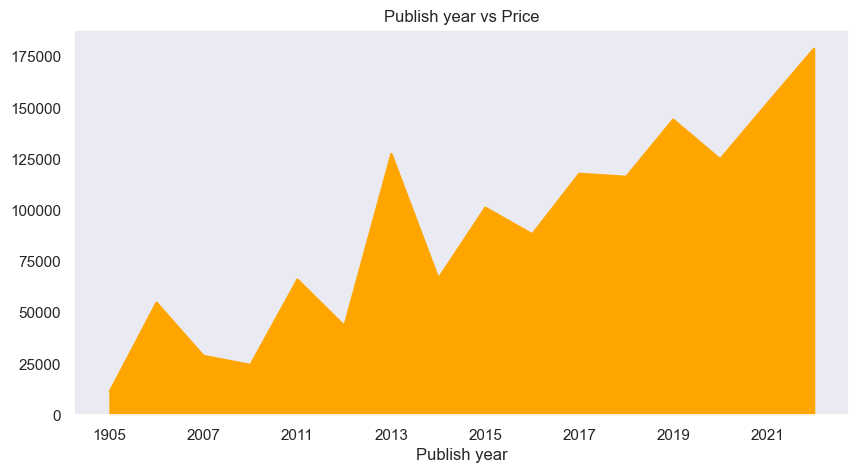

In [506]:
plt.figure(figsize=(10, 5))
train.groupby(train.publish_date.apply(lambda x: x.split('-')[0] if type(x)==str else x)).price.mean().sort_index().plot(kind='area', color='orange')
plt.title('Publish year vs Price')
plt.xlabel('Publish year')

Sách càng xuất bản sau thì giá có xu hướng tăng cao hơn => tình trạng chung do đồng tiền mất giá, lạm phát leo thang, kinh tế khó khăn do đất nước vừa trải qua 2 cuộc chiến tranh liên tiếp, ...

## size

In [507]:
train['size']

261              NaN
746              NaN
1380             NaN
240              NaN
1644       15.5 x 23
            ...     
1130             NaN
1294             NaN
860     14 x 20.5 cm
1459             NaN
1126    14 x 20.5 cm
Name: size, Length: 1611, dtype: object

In [508]:
# value count
train['size'].value_counts()

14.5 x 20.5 cm                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        53
16 x 24 cm                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [509]:
# remove all html tags
import re

train['size'] = train['size'].apply(lambda x: re.sub('<[^<]+?>', '', x) if type(x) == str else x)
train['size'].value_counts(dropna=False)

NaN               1066
14.5 x 20.5 cm      55
16 x 24 cm          43
13 x 20.5 cm        42
14 x 20.5 cm        34
                  ... 
20.5 x 27 cm         1
13x20 cm             1
12.5 x 18 cm         1
20.5 x 27 cm\n       1
14 x 20,5            1
Name: size, Length: 210, dtype: int64

Hầu hết là sách khổ lớn - trung bình. Khá ít sách khổ nhỏ

## cover_type

In [510]:
train.cover_type

261     Bìa mềm
746     Bìa mềm
1380        NaN
240     Bìa mềm
1644    Bìa mềm
         ...   
1130        NaN
1294        NaN
860     Bìa mềm
1459    Bìa mềm
1126    Bìa mềm
Name: cover_type, Length: 1611, dtype: object

In [511]:
# count null
train.cover_type.isnull().sum()

442

In [512]:
train.cover_type.describe()

count        1169
unique          9
top       Bìa mềm
freq         1018
Name: cover_type, dtype: object

Ta thấy chủ yếu là sách bìa mềm và bìa cứng

## num_pages

In [513]:
train.num_pages

261     457.0
746      24.0
1380    420.0
240     352.0
1644    336.0
        ...  
1130      NaN
1294      NaN
860     400.0
1459    400.0
1126    794.0
Name: num_pages, Length: 1611, dtype: object

In [514]:
# see all data type for this column
train.num_pages.apply(type).value_counts()

<class 'str'>      929
<class 'float'>    682
Name: num_pages, dtype: int64

In [515]:
# see all row that has num_pages type == str
train.num_pages[train.num_pages.apply(type) == str]

261     457.0
746      24.0
1380    420.0
240     352.0
1644    336.0
        ...  
1044     72.0
1095      466
860     400.0
1459    400.0
1126    794.0
Name: num_pages, Length: 929, dtype: object

In [516]:
# check if an element contain all digits
train.num_pages[train.num_pages.apply(lambda x: not(x.isdigit() or '.' in x) if type(x) == str else False)]

1697    Cuốn
Name: num_pages, dtype: object

In [517]:
# count null
train.num_pages.isnull().sum()

682

This column has an outlier value (Cuốn) and many null values

In [518]:
# convert all num_pages to float
train.num_pages = train.num_pages.apply(lambda x: float(x) if type(x) == str and '.' in x else np.nan)

In [519]:
train.num_pages.describe()

count      902.000000
mean       328.784922
std        609.263993
min         12.000000
25%        160.000000
50%        264.000000
75%        403.750000
max      16868.000000
Name: num_pages, dtype: float64

Cuốn sách mỏng nhất chỉ có 12 trang, còn cuốn dày nhất có tận gần 17000 trang!

([], [])

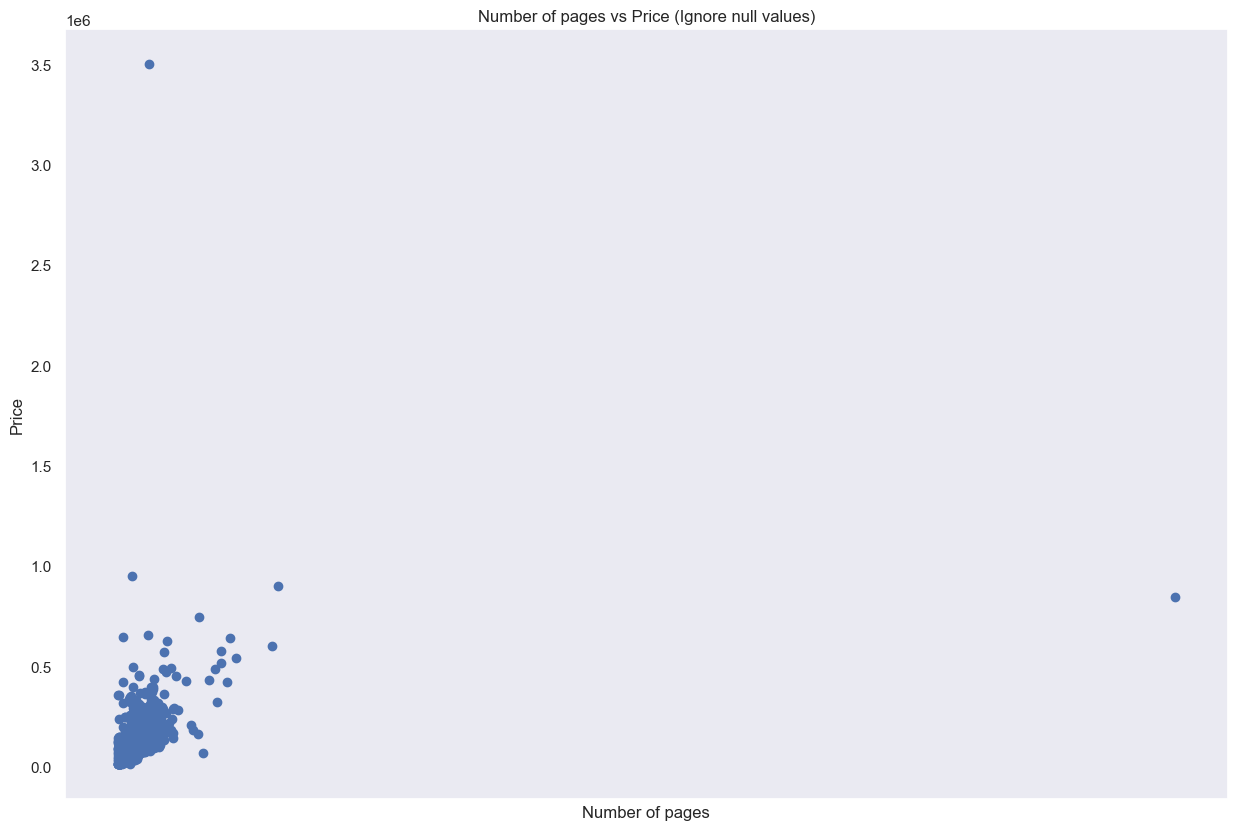

In [520]:
# plot num_pages vs price (ignor null value first)
t1 = train[train.num_pages.isnull() == False]
plt.figure(figsize=(15, 10))
plt.scatter(x=t1.num_pages, y=t1.price)
plt.xlabel('Number of pages')
plt.ylabel('Price')
plt.title('Number of pages vs Price (Ignore null values)')
plt.xticks([])

Ta nhận thấy những cuốn sách dày hơn sẽ có xu hướng có giá thành cao hơn

## category

In [521]:
train.category

261        sách văn học
746        truyện tranh
1380               sách
240        sách kinh tế
1644        sách tư duy
             ...       
1130       truyện tranh
1294       sách lịch sử
860        sách kinh tế
1459     sách chính trị
1126    sách tiếng việt
Name: category, Length: 1611, dtype: object

In [522]:
# count null
train.category.isnull().sum()

0

Có thể thấy các thể loại sách rất đa dạng và cân bằng, không hề có thể loại nào chiếm đa số. Sách nhật bản là loại sách thông dụng thứ 2, cho thấy giới trẻ đang ngày càng bị wjbu hóa

Text(0.5, 1.0, 'Category vs Price')

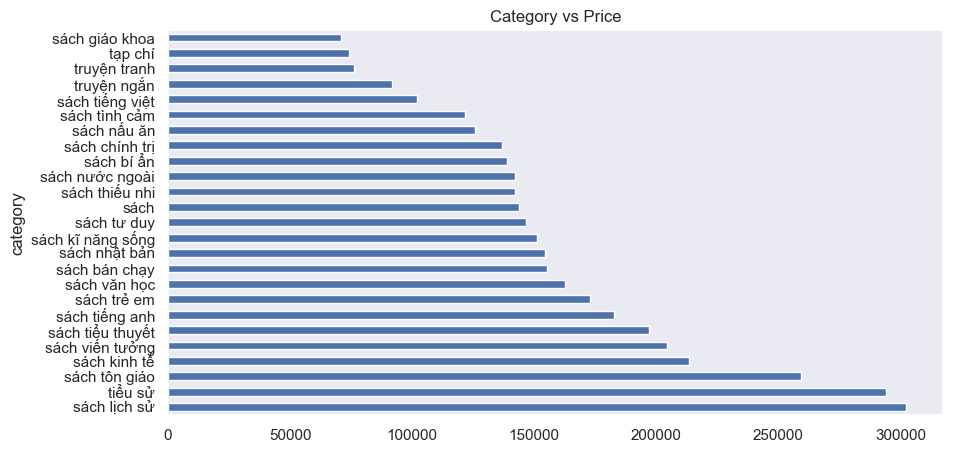

In [523]:
# plot category vs price
plt.figure(figsize=(10, 5))
train.groupby('category').price.mean().sort_values(ascending=False).plot(kind='barh')
plt.title('Category vs Price')

Text(0.5, 1.0, 'Category vs Number of pages')

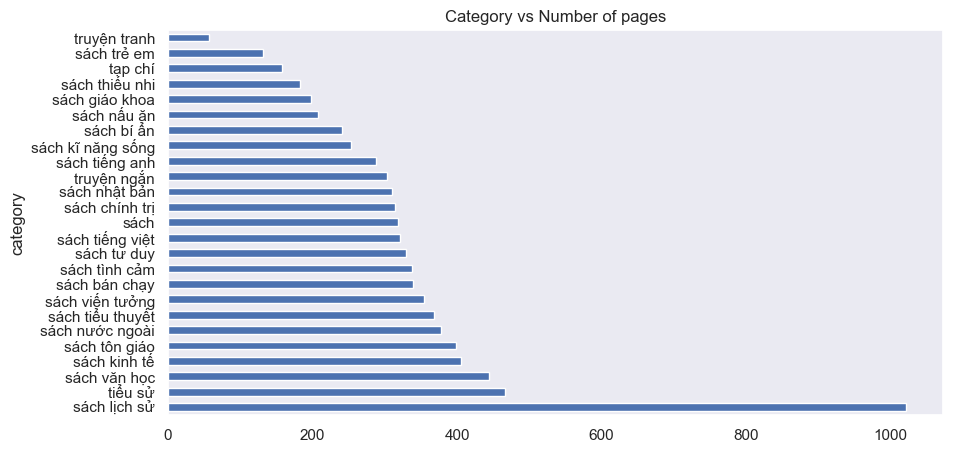

In [524]:
# category vs num_pages
plt.figure(figsize=(10, 5))
train[train.num_pages.isnull() == False].groupby('category').num_pages.mean().sort_values(ascending=False).plot(kind='barh')
plt.title('Category vs Number of pages')

Như vậy những loại sách có số trang nhiều nhất (lịch sử, tiểu sử, kinh tế, ...) thường có số trang nhiều nhất và cũng có giá cao nhất. Do đó số trang hay loại sách là những đặc trưng khá quan trọng để dự đoán giá thành

## price

Đây là trường thông tin mà ta cần dự đoán

In [525]:
train.price

261     167860.0
746     108000.0
1380     97900.0
240     243800.0
1644     93000.0
          ...   
1130     39000.0
1294    577199.0
860     108000.0
1459    256750.0
1126    189000.0
Name: price, Length: 1611, dtype: float64

Text(0.5, 1.0, 'Price distribution')

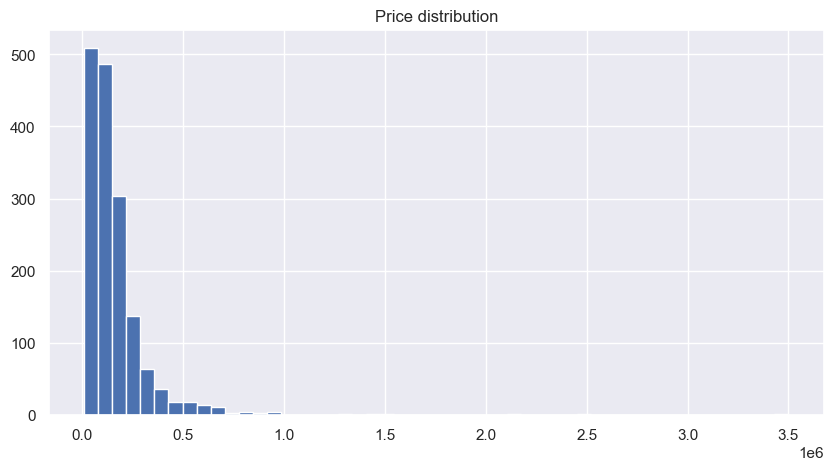

In [526]:
# plot price distribution
plt.figure(figsize=(10, 5))
train.price.hist(bins=50)
plt.title('Price distribution')

In [527]:
train.price.describe()

count    1.611000e+03
mean     1.581595e+05
std      1.799744e+05
min      8.600000e+03
25%      6.820000e+04
50%      1.190000e+05
75%      1.905000e+05
max      3.500000e+06
Name: price, dtype: float64

<AxesSubplot:>

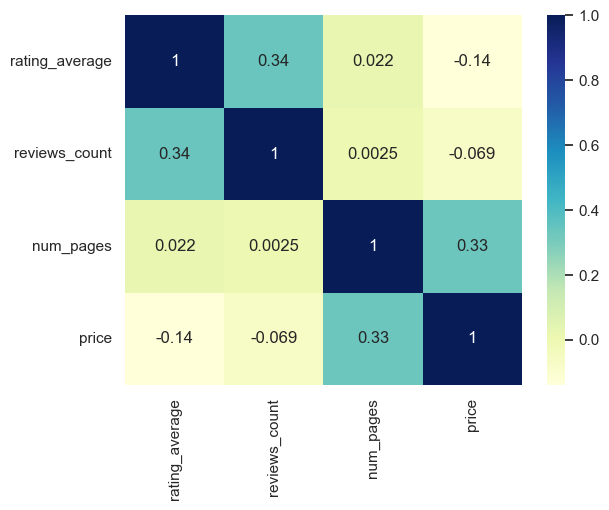

In [531]:
sns.set(style="dark", color_codes=True)
sns.heatmap(train.corr(), cmap="YlGnBu", annot=True)


In [532]:
len(ls_publisher)

30

Phần lớn các cuốn sách có giá khoảng 100-200 ngàn. Trung bình 1 cuốn sách có giá hơn 100 ngàn

# Data Processing

In [411]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1611 entries, 261 to 1126
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   rating_average  1611 non-null   float64
 1   reviews_count   1611 non-null   int64  
 2   book_name       1611 non-null   object 
 3   publisher       1611 non-null   object 
 4   publish_date    708 non-null    object 
 5   size            545 non-null    object 
 6   cover_type      1169 non-null   object 
 7   num_pages       902 non-null    float64
 8   category        1611 non-null   object 
 9   price           1611 non-null   float64
dtypes: float64(3), int64(1), object(6)
memory usage: 203.0+ KB


Ta sẽ phải xử lý các đặc trưng dạng text để chuyển chúng về dạng số để có thể sử dụng làm input cho các mô hình

In [412]:
# create an empty array
Xtrain = np.empty((len(train), 0))
# concatenate rating_average to Xtrain
Xtrain = np.concatenate((Xtrain, train.rating_average.values.reshape(-1, 1)), axis=1)
# concatenate rating_count to Xtrain
Xtrain = np.concatenate((Xtrain, train.reviews_count.values.reshape(-1, 1)), axis=1)

Xtrain.shape

(1611, 2)

In [413]:
train['round_rating'] = train['rating_average'].apply(lambda x: int(x))
grs = ['publisher', 'category', 'cover_type', 'round_rating']
aggs = ['mean', 'max', 'min', 'std', 'median']
for gr in grs:
    for agg in aggs:
        train[gr + '_' + agg] = train.groupby(gr).price.transform(agg).fillna(0)
        
        Xtrain = np.concatenate((Xtrain, train[gr + '_' + agg].values.reshape(-1, 1)), axis=1)


## book_name

In [414]:
train.book_name.isnull().sum()

0

In [415]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=500)
vectorizer.fit(train['book_name'])
book_name_vectorized = vectorizer.transform(train['book_name'])
print(book_name_vectorized)


  (0, 43)	1
  (0, 57)	1
  (0, 59)	1
  (0, 79)	1
  (0, 86)	1
  (0, 128)	1
  (0, 145)	1
  (0, 245)	1
  (0, 258)	1
  (0, 313)	1
  (0, 323)	1
  (0, 330)	1
  (0, 421)	1
  (0, 437)	1
  (1, 41)	1
  (1, 81)	1
  (1, 377)	1
  (1, 383)	1
  (1, 419)	1
  (2, 23)	1
  (2, 36)	1
  (2, 107)	1
  (2, 118)	1
  (2, 128)	1
  (2, 156)	1
  :	:
  (1608, 358)	1
  (1608, 425)	1
  (1608, 427)	1
  (1609, 50)	1
  (1609, 62)	1
  (1609, 72)	1
  (1609, 75)	1
  (1609, 191)	1
  (1609, 294)	1
  (1609, 296)	1
  (1609, 302)	1
  (1609, 318)	1
  (1609, 381)	1
  (1609, 403)	2
  (1609, 486)	2
  (1609, 491)	1
  (1610, 35)	2
  (1610, 36)	1
  (1610, 57)	1
  (1610, 59)	1
  (1610, 158)	1
  (1610, 206)	1
  (1610, 233)	2
  (1610, 347)	1
  (1610, 405)	1


In [416]:
# see number of words in the dictionary
len(vectorizer.get_feature_names())

d:\miniconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


500

In [417]:
# concatenate book_name_vectorized to Xtrain
Xtrain = np.concatenate((Xtrain, book_name_vectorized.toarray()), axis=1)
Xtrain.shape

(1611, 522)

## publisher

In [418]:
# count null
train.publisher.isnull().sum()

0

In [419]:
# get all publisher that occurs more than 10 times
ls_publisher = list(train.publisher.value_counts()[train.publisher.value_counts() > 10].index)
ls_publisher

['Nhã Nam',
 'Alphabooks',
 'NXB Trẻ',
 'Nhiều công ty phát hành',
 'Đinh Tị',
 '1980 Books',
 'First News - Trí Việt',
 'Thái Hà',
 'Skybooks',
 'CÔNG TY CỔ PHẦN ĐẦU TƯ XUẤT BẢN - THIẾT BỊ GIÁO DỤC VIỆT NAM - CHI NHÁNH TẠI THÀNH PHỐ HỒ CHÍ MINH',
 'Minh Long',
 'MCBOOKS',
 'AZ Việt Nam',
 'Nhà sách Minh Thắng',
 'Công Ty Cổ Phần Văn Hóa Đông A',
 'NXB Chính Trị Quốc Gia Sự Thật',
 'NXB Kim Đồng',
 'Bách Việt',
 'Bloom Books',
 'Công Ty TNHH Văn Hóa Việt Thư',
 'NXB Phụ Nữ Việt Nam',
 'Nhà Xuất Bản Chính Trị Quốc Gia Sự Thật',
 'Huy Hoàng Bookstore',
 'Zenbooks',
 'Công Ty CP Văn Hóa Nhân Văn',
 'BIZBOOKS',
 'Nhà Xuất Bản Kim Đồng',
 'Phương Nam Book',
 ' Accord Publishing',
 'VIỆN GIÁO DỤC IRED']

In [420]:
def publisher2int(publisher):
    if publisher in ls_publisher:
        return ls_publisher.index(publisher)
    else:
        return len(ls_publisher)

temp = train.publisher.apply(publisher2int)
temp

261      0
746     30
1380    25
240     14
1644     2
        ..
1130     4
1294     1
860      0
1459    30
1126    30
Name: publisher, Length: 1611, dtype: int64

In [421]:
# one hot encoding for publisher
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(temp.values.reshape(-1, 1))
publisher_onehot = enc.transform(temp.values.reshape(-1, 1))
publisher_onehot.shape

(1611, 31)

In [422]:
# concatenate publisher_onehot to Xtrain
Xtrain = np.concatenate((Xtrain, publisher_onehot.toarray()), axis=1)
Xtrain.shape

(1611, 553)

## publish_date

In [423]:
train.columns

Index(['rating_average', 'reviews_count', 'book_name', 'publisher',
       'publish_date', 'size', 'cover_type', 'num_pages', 'category', 'price',
       'round_rating', 'publisher_mean', 'publisher_max', 'publisher_min',
       'publisher_std', 'publisher_median', 'category_mean', 'category_max',
       'category_min', 'category_std', 'category_median', 'cover_type_mean',
       'cover_type_max', 'cover_type_min', 'cover_type_std',
       'cover_type_median', 'round_rating_mean', 'round_rating_max',
       'round_rating_min', 'round_rating_std', 'round_rating_median'],
      dtype='object')

Vì thời gian xuất bản chính xác không ảnh hưởng quá nhiều đến giá thành, ta sẽ chỉ lấy năm xuất bản làm đại diện

In [424]:
train.publish_date.isnull().sum()

903

Có tận gàn 1 nửa số sách không có thông tin ngày xuất bản, ta tạm cho trường này = 0 đối với những cuốn sách đó

In [425]:
# get only year from publish_date and set null value to 0
temp = train.publish_date.apply(lambda x: int(x.split('-')[0]) if type(x)==str else 0)
temp

261        0
746     2020
1380       0
240     2019
1644    2022
        ... 
1130       0
1294       0
860     2021
1459       0
1126    2021
Name: publish_date, Length: 1611, dtype: int64

In [426]:
# concatenate temp to Xtrain
Xtrain = np.concatenate((Xtrain, temp.values.reshape(-1, 1)), axis=1)
Xtrain.shape

(1611, 554)

## size

In [427]:
train['size']

261              NaN
746              NaN
1380             NaN
240              NaN
1644       15.5 x 23
            ...     
1130             NaN
1294             NaN
860     14 x 20.5 cm
1459             NaN
1126    14 x 20.5 cm
Name: size, Length: 1611, dtype: object

In [428]:
# get values that does not contain 'x' and is not null
temp = train['size'].copy()
temp[temp.apply(lambda x: 'x' not in str(x) and type(x) == str)]

6                   Đang cập nhật
290                      19*27 Cm
139                    17 X 24 cm
193                    16 X 24 cm
362                         15*22
133               13 cm × 20.5 cm
257                         16*24
304    Khổ: 17.4*22.5 cm\n&nbsp;
Name: size, dtype: object

Ta sẽ tách feature này thành 2 feature: chiều dài và chiều rộng để tiện tính toán. Trước đó, ta phải convert các giá trị trong trường này về cùng 1 dạng chuẩn mà ta có thể extract thông tin từ đó (w x h cm hoặc w x h)

In [429]:
# lower case all values
temp = train['size'].apply(lambda x: str(x).lower() if type(x) == str else x)
# replace '*' with ' x '
temp = temp.apply(lambda x: str(x).replace('*', ' x ') if type(x) == str else x)
# replace outlier
temp = temp.apply(lambda x: '13 x 20.5 cm' if x == '13 cm × 20.5 cm' else x)
temp = temp.apply(lambda x: np.nan if x == 'đang cập nhật' else x)

temp[temp.apply(lambda x: 'x' not in str(x) and type(x) == str)]

Series([], Name: size, dtype: object)

ok, now get width and height

In [430]:
# # get width
# width = temp.apply(lambda x: float(x.split()[0].strip()) if type(x) == str else np.nan)
# # get height
# height = temp.apply(lambda x: float(x.split()[2].strip()) if type(x) == str else np.nan)

we get an error => the data format is not we expected (xx x xx cm)

In [431]:
# iterate over value in temp
ls_false_idx = []
for idx, size in enumerate(temp):
    if type(size) == str:
        try:
            # get width
            width = float(size.split()[0].strip())
            # get height
            height = float(size.split()[2].strip())
        except Exception as e:
            ls_false_idx.append(idx)
            continue

# see value at false indexes
temp.iloc[ls_false_idx]

259       &nbsp;\n\n\n\n13 x 19 cm\n\n\n
572                              20x23cm
192                           13x20.5 cm
141                            18 x 18cm
1544                            13x19 cm
                      ...               
205                         khổ 16x24 cm
252     &nbsp;\n\n\n\n14 x 20.5 cm\n\n\n
385                              13x20,5
130                          13,5x20,5cm
121                            14 x 20,5
Name: size, Length: 124, dtype: object

In [432]:
# replace all charater that is not digit or '.' or 'x' with ''
temp = temp.apply(lambda x: re.sub(r'[^0-9x.]', '', str(x)) if type(x) == str else x)
temp

261         NaN
746         NaN
1380        NaN
240         NaN
1644    15.5x23
         ...   
1130        NaN
1294        NaN
860     14x20.5
1459        NaN
1126    14x20.5
Name: size, Length: 1611, dtype: object

In [433]:
# check again
ls_false_idx = []
for idx, size in enumerate(temp):
    if type(size) == str:
        try:
            # get width
            width = float(size.split('x')[0].strip())
            # get height
            height = float(size.split('x')[1].strip())
        except Exception as e:
            ls_false_idx.append(idx)
            continue

# see value at false indexes
temp.iloc[ls_false_idx]

272    x20x20
Name: size, dtype: object

In [434]:
# correct value at false indexes
temp[272] = temp[272][1:]
temp[272]

'20x20'

ok now the data is in the same format, we can extract width and height from that

In [435]:
# get width
width = temp.apply(lambda x: float(x.split('x')[0].strip()) if type(x) == str else np.nan)
# get height
height = temp.apply(lambda x: float(x.split('x')[1].strip()) if type(x) == str else np.nan)

In [436]:
width

261      NaN
746      NaN
1380     NaN
240      NaN
1644    15.5
        ... 
1130     NaN
1294     NaN
860     14.0
1459     NaN
1126    14.0
Name: size, Length: 1611, dtype: float64

In [437]:
height

261      NaN
746      NaN
1380     NaN
240      NaN
1644    23.0
        ... 
1130     NaN
1294     NaN
860     20.5
1459     NaN
1126    20.5
Name: size, Length: 1611, dtype: float64

In [438]:
# fill null value with mean
width = width.fillna(width.mean())
height = height.fillna(height.mean())

In [439]:
# concatenate width and height to Xtrain
Xtrain = np.concatenate((Xtrain, width.values.reshape(-1, 1)), axis=1)
Xtrain = np.concatenate((Xtrain, height.values.reshape(-1, 1)), axis=1)
Xtrain.shape

(1611, 556)

## cover_type

In [440]:
train.cover_type.value_counts(dropna=False)

Bìa mềm               1018
NaN                    442
Bìa cứng               125
Bìa gập                 15
Bìa rời                  3
Bìa Da                   2
B Format Paperback       2
Paperback                2
B-format Paperback       1
Hardback                 1
Name: cover_type, dtype: int64

In [441]:
# fill null value with 'Bìa mềm'
train.cover_type = train.cover_type.fillna('Bìa mềm')
train.cover_type.value_counts(dropna=False)

Bìa mềm               1460
Bìa cứng               125
Bìa gập                 15
Bìa rời                  3
Bìa Da                   2
B Format Paperback       2
Paperback                2
B-format Paperback       1
Hardback                 1
Name: cover_type, dtype: int64

In [442]:
# one hot encoding for cover_type
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(train.cover_type.values.reshape(-1, 1))
cover_type_onehot = enc.transform(train.cover_type.values.reshape(-1, 1))
cover_type_onehot.shape

(1611, 9)

In [443]:
# concatenate cover_type_onehot to Xtrain
Xtrain = np.concatenate((Xtrain, cover_type_onehot.toarray()), axis=1)
Xtrain.shape

(1611, 565)

## num_pages

In [444]:
train.num_pages

261     457.0
746      24.0
1380    420.0
240     352.0
1644    336.0
        ...  
1130      NaN
1294      NaN
860     400.0
1459    400.0
1126    794.0
Name: num_pages, Length: 1611, dtype: float64

In [445]:
# distribution of data type of num_pages
train.num_pages.apply(lambda x: type(x)).value_counts()

<class 'float'>    1611
Name: num_pages, dtype: int64

In [446]:
# see value that has type str
train.num_pages[train.num_pages.apply(lambda x: type(x) == str)]

Series([], Name: num_pages, dtype: float64)

In [447]:
train.num_pages

261     457.0
746      24.0
1380    420.0
240     352.0
1644    336.0
        ...  
1130      NaN
1294      NaN
860     400.0
1459    400.0
1126    794.0
Name: num_pages, Length: 1611, dtype: float64

In [448]:
# convert all to float
temp = train.num_pages.apply(lambda x: float(x) if type(x) == str else x)
temp

261     457.0
746      24.0
1380    420.0
240     352.0
1644    336.0
        ...  
1130      NaN
1294      NaN
860     400.0
1459    400.0
1126    794.0
Name: num_pages, Length: 1611, dtype: float64

In [449]:
train.num_pages[train.num_pages.apply(lambda x: not(x.isdigit() or '.' in x) if type(x) == str else False)]

Series([], Name: num_pages, dtype: float64)

ta thấy num_pages có mối liên hệ khá chặt chẽ với category, vì một số category có nhiều trang hơn những category còn lại. Do đó ta sẽ fill null bằng giá trị trung bình của category tương ứng của nó

In [450]:
# fill nan with the mean of same category
temp = train.groupby('category').num_pages.transform(lambda x: x.fillna(x.mean()))


In [451]:
temp

261      457.000000
746       24.000000
1380     420.000000
240      352.000000
1644     336.000000
           ...     
1130      56.727273
1294    1021.790698
860      400.000000
1459     400.000000
1126     794.000000
Name: num_pages, Length: 1611, dtype: float64

In [452]:
# concatenate temp to Xtrain
Xtrain = np.concatenate((Xtrain, temp.values.reshape(-1, 1)), axis=1)

In [453]:
Xtrain.shape

(1611, 566)

## category

In [454]:
train.category.value_counts(dropna=False)

sách tư duy          94
sách nhật bản        91
sách kĩ năng sống    89
sách tiếng việt      88
sách văn học         81
sách thiếu nhi       81
sách kinh tế         77
sách tiểu thuyết     74
sách giáo khoa       73
sách tiếng anh       73
sách                 72
sách nước ngoài      70
sách trẻ em          66
sách chính trị       64
sách bí ẩn           61
truyện tranh         60
sách lịch sử         60
tiểu sử              53
sách tình cảm        53
sách tôn giáo        52
tạp chí              45
sách viến tưởng      37
sách bán chạy        36
sách nấu ăn          33
truyện ngắn          28
Name: category, dtype: int64

In [455]:
# one hot encoding for category
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(train.category.values.reshape(-1, 1))
category_onehot = enc.transform(train.category.values.reshape(-1, 1))
category_onehot.shape

(1611, 25)

In [456]:
# concatenate category_onehot to Xtrain
Xtrain = np.concatenate((Xtrain, category_onehot.toarray()), axis=1)
Xtrain.shape

(1611, 591)

Vậy ta đã xây dựng được tập Xtrain từ tất cả các feature. ytrain chính là cột "price" trong dataframe

In [457]:
ytrain = train.price.values
ytrain

array([167860., 108000.,  97900., ..., 108000., 256750., 189000.])

In [458]:
ytrain.shape

(1611,)

# Modeling

In [459]:
from sklearn.metrics import mean_absolute_error

def plot_learning_curve(model, Xtrain, ytrain, Xval, yval):        
    N, d = Xtrain.shape
    train_loss, test_loss = [], []
    batches = range(100, N, 100)
    
    for m in batches:
        Xsub = Xtrain[:m, :]
        ysub = ytrain[:m].ravel()
        model.fit(Xsub,ysub)
        ysub_pred = model.predict(Xsub)
        train_loss.append(mean_absolute_error(ysub, ysub_pred))  # log_loss is the logistic loss function
        
        yval_pred = model.predict(Xval)
        test_loss.append(mean_absolute_error(yval, yval_pred))
    
    plt.figure(figsize=(15,10))
    plt.plot(batches, train_loss, ls='-', label = 'Train Loss', c='b', marker='o')
    plt.plot(batches, test_loss, ls='-', label='Test Loss', c='r', marker='x')
    plt.xlabel('Number of examples to train')
    plt.ylabel('Log Loss')
    plt.legend()
    plt.show()

    return model, train_loss, test_loss

In [460]:
# scale data
from sklearn.preprocessing import StandardScaler

Xtrain_original = Xtrain.copy()
scaler = StandardScaler()
scaler.fit(Xtrain)
Xtrain = scaler.transform(Xtrain)

In [461]:
x_train, x_val, y_train, y_val = train_test_split(Xtrain, ytrain, test_size=0.2, random_state=42)

In [462]:
train[train.book_name.apply(lambda x: 'ấn ' in x or ' ấn' in x)]

,rating_average,reviews_count,book_name,publisher,publish_date,size,cover_type,num_pages,category,price,...,cover_type_mean,cover_type_max,cover_type_min,cover_type_std,cover_type_median,round_rating_mean,round_rating_max,round_rating_min,round_rating_std,round_rating_median
1433,4.9,7,Bản Đồ Tư Duy Trong Giải Quyết Vấn Đề (Tái Bản),Alphabooks,2022-03-01,15x15cm,Bìa mềm,164.0,sách tư duy,75900.0,...,134237.163065,1456500.0,8600.0,115372.384914,102980.0,122017.058252,1456500.0,11400.0,117239.608212,89800.0
1608,0.0,0,Combo 2 cuốn Tiểu Thuyết: Trúc Thư Dao 1 - Nước Tần - Có Nàng Tên Thập+ Trúc Thư Dao 2 (Nước Tấn - Gió Nổi Cung Đình)_Tặng Bookmark,Nhiều công ty phát hành,NaN,NaN,Bìa mềm,NaN,sách tiểu thuyết,379500.0,...,0.000000,0.0,0.0,0.000000,0.0,175041.722870,3500000.0,8600.0,200178.674222,135000.0
1509,0.0,0,THẾ GIỚI PHẬT GIÁO - ấn bản bìa da in 500c – Thaihabooks,Thái Hà Book,NaN,NaN,Bìa mềm,NaN,sách tôn giáo,2500000.0,...,0.000000,0.0,0.0,0.000000,0.0,175041.722870,3500000.0,8600.0,200178.674222,135000.0
1540,0.0,0,KIM – Rudyard Kipling – bìa cứng – Xuân Hồng dịch – ấn bản kỷ niệm 65 năm thành lập NXB Kim Đồng – tủ sách Tác phẩm chọn lọc,NXB Kim Đồng,NaN,NaN,Bìa cứng,365.0,sách nước ngoài,178000.0,...,285408.872000,2162000.0,37000.0,290875.458807,178000.0,175041.722870,3500000.0,8600.0,200178.674222,135000.0
242,0.0,0,Combo 3 Cuốn Sách Tôn Giáo - Tâm Linh: Đạo - Trạng Thái Và Nghệ Thuật + Tantra - Con Đường Và Sự Chấp Nhận + Đức Phật - Cuộc Đời Và Giáo Huấn (tặng kèm bookmark thiết kế aha),Thái Hà,NaN,NaN,Bìa mềm,NaN,sách tôn giáo,335250.0,...,134237.163065,1456500.0,8600.0,115372.384914,102980.0,175041.722870,3500000.0,8600.0,200178.674222,135000.0
667,4.9,259,Trấn Hồn - Tập 1 (Tặng Kèm 1 Bookmark 2 Mặt),Cẩm Phong Books,NaN,14 x 20.5 cm,Bìa mềm,480.0,sách nước ngoài,122000.0,...,134237.163065,1456500.0,8600.0,115372.384914,102980.0,122017.058252,1456500.0,11400.0,117239.608212,89800.0
1536,0.0,0,MOBY DICK CÁ VOI TRẮNG – Herman Melville – bìa cứng – Hugo Nguyễn dịch – ấn bản kỷ niệm 65 năm thành lập NXB Kim Đồng – tủ sách Tác phẩm chọn lọc,NXB Kim Đồng,NaN,NaN,Bìa cứng,732.0,sách nhật bản,286000.0,...,285408.872000,2162000.0,37000.0,290875.458807,178000.0,175041.722870,3500000.0,8600.0,200178.674222,135000.0
1585,0.0,0,[bìa cứng sách artbook] KÝ MỘNG – Nguyễn Du – NIAYU minh họa - ấn bản kỷ niệm 65 năm thành lập NXB Kim Đồng,Kim Đồng,NaN,NaN,Bìa cứng,70.0,sách nhật bản,143000.0,...,285408.872000,2162000.0,37000.0,290875.458807,178000.0,175041.722870,3500000.0,8600.0,200178.674222,135000.0
562,4.8,104,Sách IRED Books - Tuổi Trẻ Tự Vấn - Vũ Đức Trí Thể,VIỆN GIÁO DỤC IRED,2020-03-01,12 x 20 cm,Bìa mềm,248.0,sách,76000.0,...,134237.163065,1456500.0,8600.0,115372.384914,102980.0,122017.058252,1456500.0,11400.0,117239.608212,89800.0
1705,0.0,0,"Sách THE MOUNTAIN IS YOU - Nếu Không Giải Quyết Vấn Đề, Bạn Sẽ Trở Thành Vấn Đề - BẢN QUYỀN",BIZBOOKS,NaN,NaN,Bìa mềm,303.0,sách,106560.0,...,134237.163065,1456500.0,8600.0,115372.384914,102980.0,175041.722870,3500000.0,8600.0,200178.674222,135000.0


## Linear Regression

In [463]:
# linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

liner_reg = LinearRegression()
liner_reg.fit(x_train, y_train)
y_pred = liner_reg.predict(x_val)
print('MAE on validation set: ', mean_absolute_error(y_val, y_pred),  mean_absolute_percentage_error(y_val, y_pred))

MAE on validation set:  124385.93238380268 1.1232933565093062


## Elastic Net

In [464]:
# elastic net
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(x_train, y_train)
y_pred = elastic_net.predict(x_val)
print('MAE on validation set: ', mean_absolute_error(y_val, y_pred),  mean_absolute_percentage_error(y_val, y_pred))

MAE on validation set:  101187.9832059709 0.859501967704229


## KNN Regression

In [465]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_val)
print('MAE on validation set: ', mean_absolute_error(y_val, y_pred),  mean_absolute_percentage_error(y_val, y_pred))

MAE on validation set:  91968.76656346749 0.7321004305417673


## Random Forest

In [466]:
# Random Forest Regessor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_val)
print('MAE on validation set: ', mean_absolute_error(y_val, y_pred),  mean_absolute_percentage_error(y_val, y_pred))

MAE on validation set:  66297.5677909425 0.46592037968678185


## Gradient Boosting

In [467]:
# gradient boosting regressor
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators=100, max_depth=10, random_state=42)
gbr.fit(x_train, y_train)
y_pred = gbr.predict(x_val)
print('MAE on validation set: ', mean_absolute_error(y_val, y_pred),  mean_absolute_percentage_error(y_val, y_pred))

MAE on validation set:  63846.48853319927 0.37420351239399474


## Support Vector Machine

In [468]:
# support vector machine
from sklearn.svm import SVR

svr = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr.fit(x_train, y_train)
y_pred = svr.predict(x_val)
print('MAE on validation set: ', mean_absolute_error(y_val, y_pred),  mean_absolute_percentage_error(y_val, y_pred))

MAE on validation set:  97733.75046576675 0.8647129778328505


## LGBM Regressor

In [469]:
# lgbm regressor
import lightgbm as lgb

lgbm = lgb.LGBMRegressor(n_estimators=100, max_depth=10, random_state=42)
lgbm.fit(x_train, y_train)
y_pred = lgbm.predict(x_val)
print('MAE on validation set: ', mean_absolute_error(y_val, y_pred),  mean_absolute_percentage_error(y_val, y_pred))

MAE on validation set:  68330.04053934413 0.45712262424251987


## XG Boost

In [470]:
# xg boost
import xgboost

xgb = xgboost.XGBRegressor(n_estimators=100, max_depth=10, random_state=42)
xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_val)
print('MAE on validation set: ', mean_absolute_error(y_val, y_pred),  mean_absolute_percentage_error(y_val, y_pred))

MAE on validation set:  63125.71757389222 0.34731199374160987


Text(0, 0.5, 'MAPE')

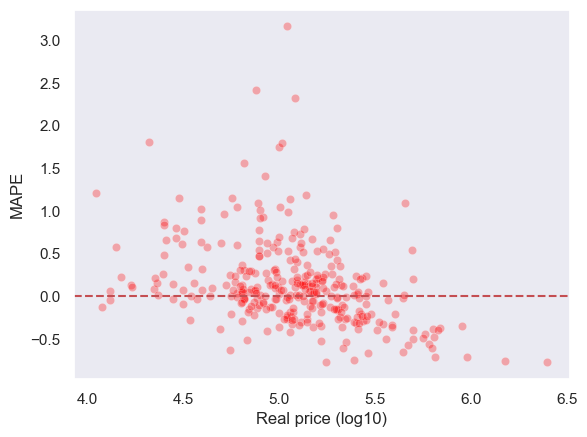

In [471]:
sns.set(style="dark", color_codes=True)

sns.scatterplot(x= np.log10(y_val), y=(y_pred - y_val) / y_val, alpha = 0.3, color = 'red')
plt.axhline(y = 0, color = 'r', linestyle = '--')
plt.xlabel('Real price (log10)')
plt.ylabel('MAPE')

## MLP Regressor

In [117]:
# catboost regressor
import catboost

# neural network
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=1000, random_state=42)
mlp.fit(x_train, y_train)
y_pred = mlp.predict(x_val)
print('MAE on validation set: ', mean_absolute_error(y_val, y_pred),  mean_absolute_percentage_error(y_val, y_pred))

MAE on validation set:  100642.20728805271 0.7974260554251086


d:\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


## CatBoost

In [118]:
# catboost regressor
import catboost

cat = catboost.CatBoostRegressor(n_estimators=100, max_depth=10, random_state=42)
cat.fit(x_train, y_train)
y_pred = cat.predict(x_val)
print('MAE on validation set: ', mean_absolute_error(y_val, y_pred),  mean_absolute_percentage_error(y_val, y_pred))

Learning rate set to 0.277042
0:	learn: 169635.6068530	total: 173ms	remaining: 17.1s
1:	learn: 165565.8259184	total: 197ms	remaining: 9.64s
2:	learn: 154181.5728526	total: 219ms	remaining: 7.09s
3:	learn: 150336.4882613	total: 241ms	remaining: 5.78s
4:	learn: 147674.7441302	total: 264ms	remaining: 5.02s
5:	learn: 144237.2476886	total: 286ms	remaining: 4.48s
6:	learn: 141089.7198490	total: 308ms	remaining: 4.09s
7:	learn: 137770.8199045	total: 329ms	remaining: 3.78s
8:	learn: 128151.9411184	total: 350ms	remaining: 3.54s
9:	learn: 120450.1222835	total: 373ms	remaining: 3.36s
10:	learn: 118910.5598356	total: 399ms	remaining: 3.23s
11:	learn: 116093.0595469	total: 427ms	remaining: 3.13s
12:	learn: 114292.9882103	total: 452ms	remaining: 3.03s
13:	learn: 112734.9238472	total: 475ms	remaining: 2.92s
14:	learn: 105634.1909554	total: 499ms	remaining: 2.83s
15:	learn: 100547.4023208	total: 520ms	remaining: 2.73s
16:	learn: 96210.6810562	total: 543ms	remaining: 2.65s
17:	learn: 95118.1152458	tota

## Finetune

Ta thấy các model dạng tree-based cho kết quả ban đầu có vẻ tốt hơn, nên ta sẽ thử finetune những mô hình này

In [119]:
def gen_col_names(prefix, n):
    return [prefix + str(i) for i in range(n)]

In [124]:
aggs_col = []
for gr in grs:
    for agg in aggs:
        aggs_col.append(gr + '_' + agg)

In [127]:
cols = ['rating', 'reviews_count'] + aggs_col + gen_col_names('name', 500) + gen_col_names('publisher', 31) + gen_col_names('publish_date', 1) + ['width', 'height'] + gen_col_names('cover_type', 9) + ['num_pages'] + gen_col_names('category', 25)
train_df = pd.DataFrame(x_train, columns=cols)
val_df = pd.DataFrame(x_val, columns=cols)

train_df

,rating,reviews_count,publisher_mean,publisher_max,publisher_min,publisher_std,publisher_median,category_mean,category_max,category_min,...,category15,category16,category17,category18,category19,category20,category21,category22,category23,category24
0,-0.664655,-0.222097,-1.113278,-0.929496,-0.673655,-0.642028,-0.986379,-0.283957,-0.260432,-0.722139,...,-0.206684,-0.18444,-0.182633,-0.248927,-0.15332,-0.230089,-0.18444,-0.132996,-0.196684,-0.169516
1,-0.664655,-0.222097,0.355967,0.317597,-0.120677,0.327385,0.049067,0.976652,-0.104934,0.264604,...,-0.206684,-0.18444,-0.182633,-0.248927,-0.15332,-0.230089,-0.18444,-0.132996,-0.196684,-0.169516
2,1.554019,-0.048546,-0.321236,0.009743,-0.669012,-0.283116,-0.215497,-0.993528,-0.823390,-0.029069,...,-0.206684,-0.18444,-0.182633,-0.248927,-0.15332,-0.230089,-0.18444,-0.132996,-0.196684,-0.169516
3,1.554019,2.559987,-0.321236,0.009743,-0.669012,-0.283116,-0.215497,-0.993528,-0.823390,-0.029069,...,-0.206684,-0.18444,-0.182633,-0.248927,-0.15332,-0.230089,-0.18444,-0.132996,-0.196684,-0.169516
4,-0.664655,-0.222097,-1.086572,-0.664695,-0.723180,-0.438844,-1.181249,-1.547298,-0.647736,-1.086294,...,-0.206684,-0.18444,-0.182633,-0.248927,-0.15332,-0.230089,-0.18444,-0.132996,-0.196684,-0.169516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1283,1.554019,-0.122174,-0.661423,-0.748295,-0.398172,-0.402768,-0.558239,0.433299,-0.231636,-0.865451,...,-0.206684,-0.18444,-0.182633,-0.248927,-0.15332,-0.230089,-0.18444,-0.132996,-0.196684,-0.169516
1284,-0.664655,-0.222097,-0.024766,0.226474,-0.181500,-0.061346,0.206109,-0.204818,-0.176924,-0.381478,...,-0.206684,-0.18444,-0.182633,4.017250,-0.15332,-0.230089,-0.18444,-0.132996,-0.196684,-0.169516
1285,1.599298,-0.185283,0.068303,0.130544,-0.446149,-0.029161,0.168511,-1.450236,-0.739018,-1.080420,...,-0.206684,-0.18444,-0.182633,-0.248927,-0.15332,-0.230089,-0.18444,-0.132996,5.084290,-0.169516
1286,1.463461,-0.102890,0.068303,0.130544,-0.446149,-0.029161,0.168511,-0.286313,-0.352003,0.053159,...,-0.206684,-0.18444,-0.182633,-0.248927,-0.15332,-0.230089,-0.18444,-0.132996,-0.196684,-0.169516


In [128]:
col = [f for f in train_df.columns.tolist() if 'name' not in f and 'publisher' not in f]
col

['rating',
 'reviews_count',
 'category_mean',
 'category_max',
 'category_min',
 'category_std',
 'category_median',
 'cover_type_mean',
 'cover_type_max',
 'cover_type_min',
 'cover_type_std',
 'cover_type_median',
 'round_rating_mean',
 'round_rating_max',
 'round_rating_min',
 'round_rating_std',
 'round_rating_median',
 'publish_date0',
 'width',
 'height',
 'cover_type0',
 'cover_type1',
 'cover_type2',
 'cover_type3',
 'cover_type4',
 'cover_type5',
 'cover_type6',
 'cover_type7',
 'cover_type8',
 'num_pages',
 'category0',
 'category1',
 'category2',
 'category3',
 'category4',
 'category5',
 'category6',
 'category7',
 'category8',
 'category9',
 'category10',
 'category11',
 'category12',
 'category13',
 'category14',
 'category15',
 'category16',
 'category17',
 'category18',
 'category19',
 'category20',
 'category21',
 'category22',
 'category23',
 'category24']

### Random Forest

Model seems to be overfit. Let's tune some params

In [168]:
from sklearn.model_selection import GridSearchCV
gbr = GradientBoostingRegressor()
param_grid = {
    'n_estimators': [50, 80, 100, 200, 500, 1000],
    'max_depth': [None, 10, 15, 20],
}

grid_search_cv = GridSearchCV(gbr, param_grid, cv=3, scoring='neg_mean_absolute_percentage_error', n_jobs=-1)
grid_search_cv.fit(Xtrain, ytrain)



GridSearchCV(cv=3, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 15, 20],
                         'n_estimators': [50, 80, 100, 200, 500, 1000]},
             scoring='neg_mean_absolute_percentage_error')

In [169]:
# get best model
best_model = grid_search_cv.best_estimator_
print(best_model)

GradientBoostingRegressor(max_depth=10, n_estimators=1000)


In [170]:
# get best params
best_params = grid_search_cv.best_params_
print(best_params)

{'max_depth': 10, 'n_estimators': 1000}


In [171]:
# get score of best_model
best_score = grid_search_cv.best_score_
print(best_score)

-0.4391238781094567


In [165]:
best_model = GradientBoostingRegressor(**best_params)

In [166]:
best_model.fit(pd.DataFrame(data = x_train, columns = cols), y_train)

GradientBoostingRegressor(max_depth=10, n_estimators=500, random_state=42)

In [167]:
y_pred = best_model.predict(x_val)
print('MAE on validation set: ', mean_absolute_error(y_val, y_pred),  mean_absolute_percentage_error(y_val, y_pred))

MAE on validation set:  63345.59668392136 0.3590088903012293


d:\miniconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


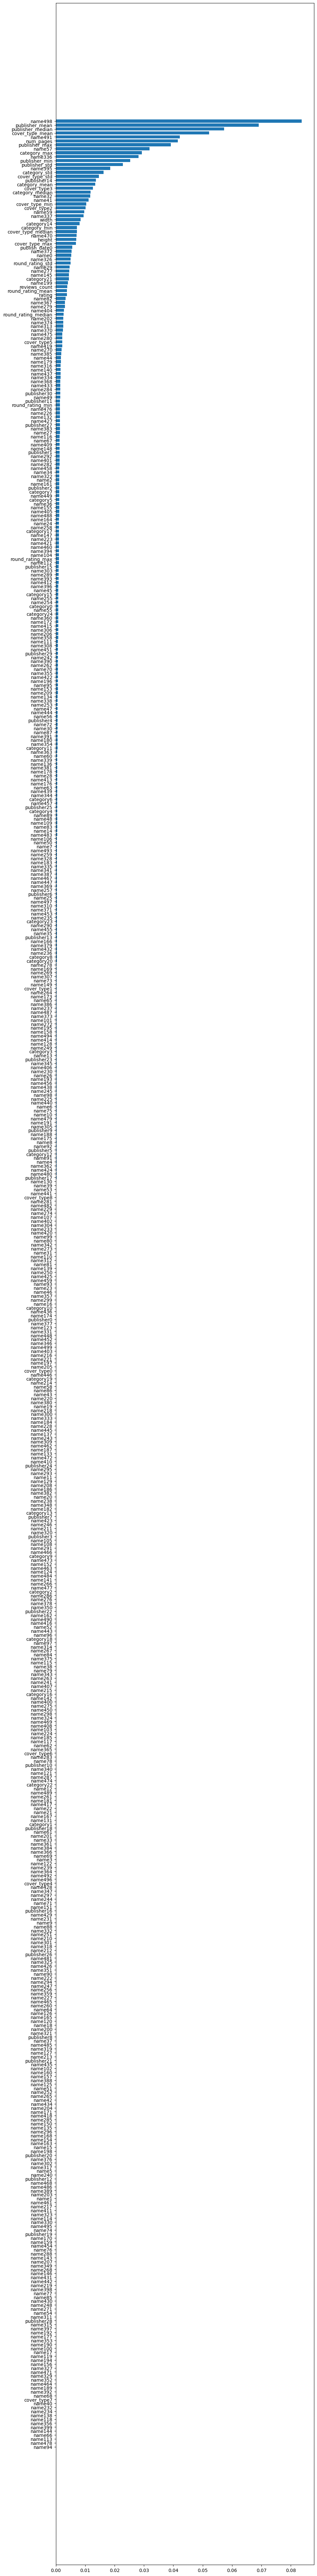

In [136]:
# get features importance
sorted_idx = best_model.feature_importances_.argsort()
# plot features importance
plt.figure(figsize=(10, 100))
plt.barh(train_df.columns[sorted_idx], best_model.feature_importances_[sorted_idx])
plt.show()

In [137]:
vectorizer.get_feature_names()[29]

d:\miniconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


'bão'

Có thể thấy các feature về name khá quan trọng. Khi ta bỏ chúng đi thì kết quả cũng thấp hơn. Features số trang cũng khá quan trọng, vì có thể ảnh hưởng đến giá thành in ra sách. 

Kết quả thu được chưa được tốt cho lắm, cho dữ liệu bị thiếu khá nhiều và có rất nhiều trường không phải là số